In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # try plotly, it's amazing
sns.set_theme(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv('TrainingWiDS2021.csv')

In [3]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[categorical_features].head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type
0,Caucasian,M,Floor,Floor,admit,CTICU
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU


In [4]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numerical_features].shape

(130157, 175)

In [5]:
binary_features = [feature for feature in numerical_features if df[feature].nunique() == 2]
print("Total binary: ", len(binary_features))

Total binary:  14


In [6]:
df[binary_features].head(3)

,elective_surgery,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0.0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0


In [7]:
df[binary_features].isnull().sum()

elective_surgery                 0
apache_post_operative            0
arf_apache                       0
gcs_unable_apache              709
intubated_apache                 0
ventilated_apache                0
aids                             0
cirrhosis                        0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
diabetes_mellitus                0
dtype: int64

In [10]:
df['gcs_unable_apache'].value_counts()

0.0    127967
1.0      1481
Name: gcs_unable_apache, dtype: int64

In [13]:
df['gcs_unable_apache'].value_counts().sum()

129448

In [12]:
# Only about 0.5 percent of the entire column is missing
df['gcs_unable_apache'].isnull().sum()/df['gcs_unable_apache'].value_counts().sum()

0.005477102774859403

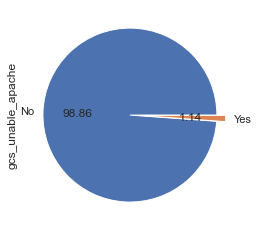

In [9]:
df['gcs_unable_apache'].value_counts().plot(kind="pie", explode=[0,0.1], autopct="%.2f", labels=["No","Yes"])
plt.show()

In [14]:
# Let's impute the gcs_unable_apache variable 
# Reference: https://s3.amazonaws.com/assets.datacamp.com/production/course_17404/slides/chapter4.pdf

from sklearn.preprocessing import OrdinalEncoder
# Create Ordinal Encoder

gcs_unable_apache_ord_enc = OrdinalEncoder()
# Select non-null values in ambience
gcs_unable_apache = df['gcs_unable_apache']
gcs_unable_apache_not_null = gcs_unable_apache[gcs_unable_apache.notnull()]
reshaped_vals = gcs_unable_apache_not_null.values.reshape(-1, 1)
# Encode the non-null values of ambience
encoded_vals = gcs_unable_apache_ord_enc.fit_transform(reshaped_vals)
# Replace the gcs unable apache column with ordinal values
df.loc[gcs_unable_apache.notnull(), 'gcs_unable_apache'] = np.squeeze(encoded_vals)

In [ ]:
# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}
# Loop over columns to encode
for col_name in users:
# Create ordinal encoder for the column
ordinal_enc_dict[col_name] = OrdinalEncoder()
# Select the nin-null values in the column
col = users[col_name]
col_not_null = col[col.notnull()]
reshaped_vals = col_not_null.values.reshape(-1, 1)
# Encode the non-null values of the column
encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)

In [16]:
df_KNN_imputed = df.copy(deep=True)
# Create MICE imputer
KNN_imputer = KNN()
df_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(imputed))

reshaped_col = imputed['gcs_unable_apache'].values.reshape(-1, 1)
df_KNN_imputed['gcs_unable_apache'] = ordinal_enc['gcs_unable_apache'].inverse_transform(reshaped_col)

NameError: name 'KNN' is not defined